# HOW DID LOCKDOWN AFFECT AIR POLLUTION

 <img src="https://cdn-images-1.medium.com/max/800/1*KUQSMz2mVeOlUYvtSgvSRQ.gif" width="4000">

<div class="alert alert-block alert-info">
On March 25 2020, the Indian government placed its population of more than 1.3 billion citizens under lockdown in an effort to reduce the spread of the COVID-19 disease. All non-essential shops, markets and places of worship were closed with only essential services including water, electricity and health services remaining active.

Citizens started to experience better air quality so much so that the scenic Dhauladhar Peaks of Himachal Pradesh became visible from neighbouring states. On normal days, these peaks lie hidden behind he film of smog.

<img src="https://pbs.twimg.com/media/EUqZ7QIVAAA5Dz1?format=jpg&name=large" width="2000">

<div class="alert alert-block alert-info">

The various types of air pollutants in the datasets can be classified as :



<img src="https://imgur.com/C4q7gwX.png" width="700">

<div class="alert alert-block alert-success">

Particulate matter (PM2.5 and PM10) > Particulate matter is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air. PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5.Source. The following diagram will help to understand the concept more concretely.

Nitrogen Oxides (NO, NO2, NOx) > Nitrogen oxides are a group of seven gases and compounds composed of nitrogen and oxygen, sometimes collectively known as NOx gases.The two most common and hazardous oxides of nitrogen are nitric oxide(NO) and nitrogen dioxide(NO2)

Sulphur Dioxide(SO2) > Sulfur dioxide, or SO2 is a colorless gas with a strong odor, similar to a just-struck match. It is formed when fuel containing sulfur, such as coal and oil, is burned, creating air pollution.

Carbon Monoxide(CO) > Carbon monoxide is a colorless, highly poisonous gas. Under pressure, it becomes a liquid. It is produced by burning gasoline, natural gas, charcoal, wood, and other fuels.

Benzene, Toluene and Xylene (BTX) > Benzene, toluene, xylene, and formaldehyde are well-known indoor air pollutants, especially after house decoration. They are also common pollutants in the working places of the plastic industry, chemical industry, and leather industry.

Ammonia( NH3) > Ammonia pollution is pollution by the chemical ammonia (NH3) – a compound of nitrogen and hydrogen which is a byproduct of agriculture and industry.

Ozone(O3) > Ground-level ozone is a colorless and highly irritating gas that forms just above the earth's surface. It is called a "secondary" pollutant because it is produced when two primary pollutants react in sunlight and stagnant air. These two primary pollutants are nitrogen oxides (NOx) and volatile organic compounds (VOCs).

<div class="alert alert-block alert-info">

In this notebook, the analysis has been done in two parts:<br>

1) Analysis of the pollution level in India, over the years - from 2015 to 2020<br>

This will a holistic view of how the pollutant levels have been rising in India and what is the current situation.<br>

2)Effect of Lockdown on the Pollution level in India<br>

Here we shall examine the pollution level in India before and after the first stage of Lockdown. Also we shall compare the pollution level around the same months in 2019, to see the the difference, if any. Additionally we could also examine the difference between the the current dates and the winter months(October, November) of 2019 when the pollution levels are generally the highest in Northern parts of India.

# Table of contents

[Importing necessary Libraries](Importing_necessary_Libraries)<br>
[Data preprocessing](#Data_preprocessing)<br>
[Date time format convertion](Date_time_format_convertion)<br>
[Exploratory Data Analysis](Exploratory_Data_Analysis)

# Importing_necessary_Libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import missingno as msno
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
!pip install cufflinks

In [3]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Data_preprocessing 

In [4]:
#Importing the dataset
data = pd.read_csv(r'C:\Users\BR\Downloads\archive (17)\city_day.csv')
data

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [5]:
#Missing values sum
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
# Percentage of missing values in each column
(data.isnull().sum()/len(data))*100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

<AxesSubplot:>

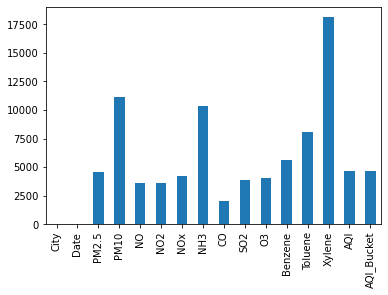

In [7]:
#Plotting missing values in bar graph
data.isnull().sum().plot(kind="bar")

<AxesSubplot:>

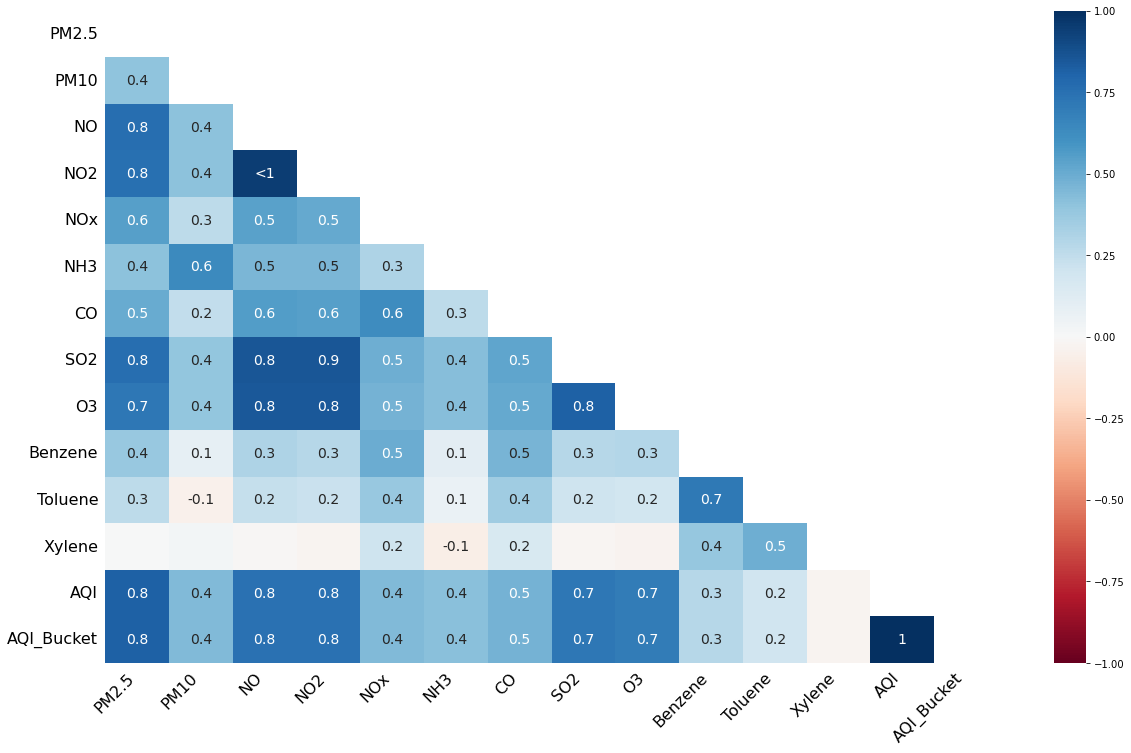

In [8]:
msno.heatmap(data)

<div class="alert alert-block alert-success">
Visualiztion of the correlation between the number of missing values in different columns as known as heatmap

In [9]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [10]:
df_temp = data.copy()

In [11]:
#For imputation of values we created a temperarory dataset to use the KNN imputer
df_temp.drop(['City','AQI_Bucket','Xylene','Date'], axis=1,inplace = True)

In [12]:
imputer=KNNImputer(n_neighbors=2)
After_imputation=imputer.fit_transform(df_temp)
After_imputation
col=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI']
After_imputation=pd.DataFrame(After_imputation,columns=col)
# Missing values in each coloum after running the KNN imputer
After_imputation.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

<div class="alert alert-block alert-success">
Imputation for completing missing values using k-Nearest Neighbors.
Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [13]:
#The dataset after imputations
After_imputation

PM2.5     PM10     NO    NO2    NOx     NH3     CO    SO2      O3  \
0       34.515  154.750   0.92  18.22  17.15   8.975   0.92  27.64  133.36   
1       25.830  226.235   0.97  15.69  16.46   9.095   0.97  24.55   34.06   
2       90.945  206.085  17.40  19.30  29.70   8.990  17.40  29.07   30.70   
3       25.830  226.235   1.70  18.48  17.97   9.085   1.70  18.59   36.08   
4      156.115  236.765  22.10  21.42  37.76   8.905  22.10  39.33   39.31   
...        ...      ...    ...    ...    ...     ...    ...    ...     ...   
29526   15.020   50.940   7.68  25.06  19.54  12.470   0.47   8.55   23.30   
29527   24.380   74.090   3.42  26.06  16.53  11.990   0.52  12.72   30.14   
29528   22.910   65.730   3.45  29.53  18.33  10.710   0.48   8.42   30.96   
29529   16.640   49.970   4.05  29.26  18.80  10.030   0.52   9.84   28.30   
29530   15.000   66.000   0.40  26.85  14.05   5.200   0.59   2.10   17.05   

       Benzene  Toluene    AQI  
0         0.00     0.02   93.0  
1         3.68     5.50  125.5  
2         6.80    16.40  268.0  
3         4.43    10.14  177.5  
4         7.01    18.89  376.0  
...        ...      ...    ...  
29526     2.24    12.07   41.0  
29527     0.74     2.21   70.0  
29528     0.01     0.01   68.0  
29529     0.00     0.00   54.0  
29530     0.00     0.00   50.0  

[29531 rows x 12 columns]

In [14]:
data

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [15]:
# Interchanging the columns of the main dataframe by the dataframe after imputations
data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'AQI']]=After_imputation[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'AQI']]

In [16]:
data

City        Date    PM2.5     PM10     NO    NO2    NOx  \
0          Ahmedabad  2015-01-01   34.515  154.750   0.92  18.22  17.15   
1          Ahmedabad  2015-01-02   25.830  226.235   0.97  15.69  16.46   
2          Ahmedabad  2015-01-03   90.945  206.085  17.40  19.30  29.70   
3          Ahmedabad  2015-01-04   25.830  226.235   1.70  18.48  17.97   
4          Ahmedabad  2015-01-05  156.115  236.765  22.10  21.42  37.76   
...              ...         ...      ...      ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27   15.020   50.940   7.68  25.06  19.54   
29527  Visakhapatnam  2020-06-28   24.380   74.090   3.42  26.06  16.53   
29528  Visakhapatnam  2020-06-29   22.910   65.730   3.45  29.53  18.33   
29529  Visakhapatnam  2020-06-30   16.640   49.970   4.05  29.26  18.80   
29530  Visakhapatnam  2020-07-01   15.000   66.000   0.40  26.85  14.05   

          NH3     CO    SO2      O3  Benzene  Toluene  Xylene    AQI  \
0       8.975   0.92  27.64  133.36     0.00     0.02    0.00   93.0   
1       9.095   0.97  24.55   34.06     3.68     5.50    3.77  125.5   
2       8.990  17.40  29.07   30.70     6.80    16.40    2.25  268.0   
3       9.085   1.70  18.59   36.08     4.43    10.14    1.00  177.5   
4       8.905  22.10  39.33   39.31     7.01    18.89    2.78  376.0   
...       ...    ...    ...     ...      ...      ...     ...    ...   
29526  12.470   0.47   8.55   23.30     2.24    12.07    0.73   41.0   
29527  11.990   0.52  12.72   30.14     0.74     2.21    0.38   70.0   
29528  10.710   0.48   8.42   30.96     0.01     0.01    0.00   68.0   
29529  10.030   0.52   9.84   28.30     0.00     0.00    0.00   54.0   
29530   5.200   0.59   2.10   17.05     0.00     0.00     NaN   50.0   

         AQI_Bucket  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
29526          Good  
29527  Satisfactory  
29528  Satisfactory  
29529  Satisfactory  
29530          Good  

[29531 rows x 16 columns]

In [17]:
data.isnull().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene        18109
AQI               0
AQI_Bucket     4681
dtype: int64

In [18]:
# Eliminating Xylene column for having 61% missing values
data.drop(['Xylene'], axis=1,inplace = True)

In [19]:
# Eliminating AQI_Bucket column because it doesn't add any value to the dataset
data.drop(['AQI_Bucket'], axis=1,inplace = True)

In [20]:
data.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      64.962296    110.710522     17.582197     27.764025     34.170153   
std       61.014060     80.814039     22.358359     23.296424     35.215977   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       29.055000     54.090000      5.980000     12.170000     12.865000   
50%       48.370000     95.940000     10.910000     22.670000     25.180000   
75%       74.480000    135.710000     18.240000     35.257500     41.035000   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3      Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.00000   
mean      19.958230      2.675800     14.567506     33.078854      2.87111   
std       21.865566      9.383903     17.986081     20.993938     14.29880   
min        0.010000      0.000000      0.010000      0.010000      0.00000   
25%        8.400000      0.520000      5.910000     17.897500      0.02000   
50%       12.820000      0.930000      9.320000     30.810000      0.84000   
75%       24.665000      1.610000     14.750000     43.020000      3.11750   
max      352.890000    175.810000    193.860000    257.730000    455.03000   

            Toluene           AQI  
count  29531.000000  29531.000000  
mean       6.887113    159.380987  
std       17.437513    133.103368  
min        0.000000     13.000000  
25%        0.000000     79.000000  
50%        1.815000    117.000000  
75%        8.235000    188.000000  
max      454.850000   2049.000000

### Cities in the dataset

In [21]:
city = data['City'].value_counts()
print("Number of cities in the dataset-",city.nunique())
print(city.index)

Number of cities in the dataset- 20
Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object')


### Date_time_format_convertion 

In [22]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data

City       Date    PM2.5     PM10     NO    NO2    NOx  \
0          Ahmedabad 2015-01-01   34.515  154.750   0.92  18.22  17.15   
1          Ahmedabad 2015-01-02   25.830  226.235   0.97  15.69  16.46   
2          Ahmedabad 2015-01-03   90.945  206.085  17.40  19.30  29.70   
3          Ahmedabad 2015-01-04   25.830  226.235   1.70  18.48  17.97   
4          Ahmedabad 2015-01-05  156.115  236.765  22.10  21.42  37.76   
...              ...        ...      ...      ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27   15.020   50.940   7.68  25.06  19.54   
29527  Visakhapatnam 2020-06-28   24.380   74.090   3.42  26.06  16.53   
29528  Visakhapatnam 2020-06-29   22.910   65.730   3.45  29.53  18.33   
29529  Visakhapatnam 2020-06-30   16.640   49.970   4.05  29.26  18.80   
29530  Visakhapatnam 2020-07-01   15.000   66.000   0.40  26.85  14.05   

          NH3     CO    SO2      O3  Benzene  Toluene    AQI  year  month  
0       8.975   0.92  27.64  133.36     0.00     0.02   93.0  2015      1  
1       9.095   0.97  24.55   34.06     3.68     5.50  125.5  2015      1  
2       8.990  17.40  29.07   30.70     6.80    16.40  268.0  2015      1  
3       9.085   1.70  18.59   36.08     4.43    10.14  177.5  2015      1  
4       8.905  22.10  39.33   39.31     7.01    18.89  376.0  2015      1  
...       ...    ...    ...     ...      ...      ...    ...   ...    ...  
29526  12.470   0.47   8.55   23.30     2.24    12.07   41.0  2020      6  
29527  11.990   0.52  12.72   30.14     0.74     2.21   70.0  2020      6  
29528  10.710   0.48   8.42   30.96     0.01     0.01   68.0  2020      6  
29529  10.030   0.52   9.84   28.30     0.00     0.00   54.0  2020      6  
29530   5.200   0.59   2.10   17.05     0.00     0.00   50.0  2020      7  

[29531 rows x 16 columns]

In [23]:
print(f" The data is between date {data['Date'].min()} and {data['Date'].max()}")

 The data is between date 2015-01-01 00:00:00 and 2020-07-01 00:00:00



# Exploratory_Data_Analysis


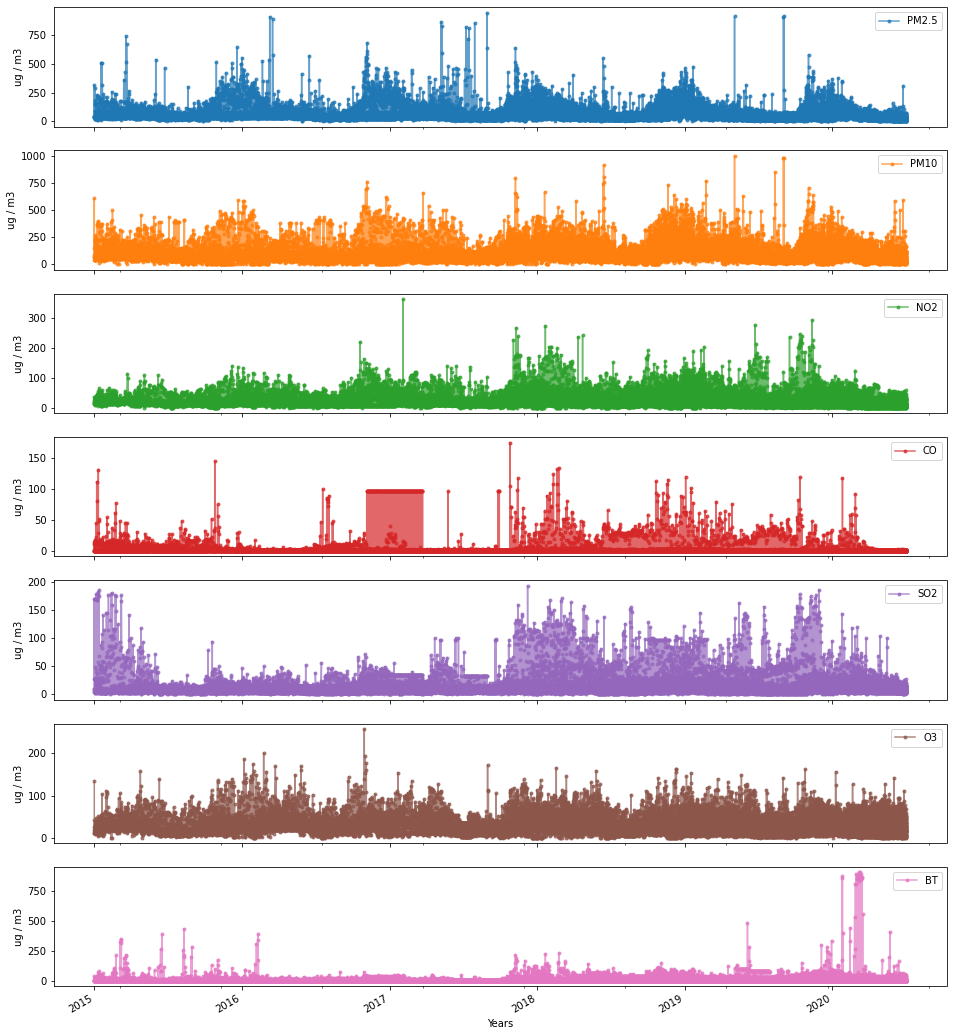

In [24]:
data['BT'] = data['Benzene']+data['Toluene']
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BT']
data.set_index('Date',inplace = True)
axes = data[pollutants].plot(marker='.', alpha=0.7  ,figsize=(16, 20), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

<div class="alert alert-block alert-info">
1) PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared 
to the summer ones.<br>
2) SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also.The same 
pattern is also reflected in BT levels also.<br>
3) NO, O3 and NO2 have no fixed increase or decrease in per cubic meter air.

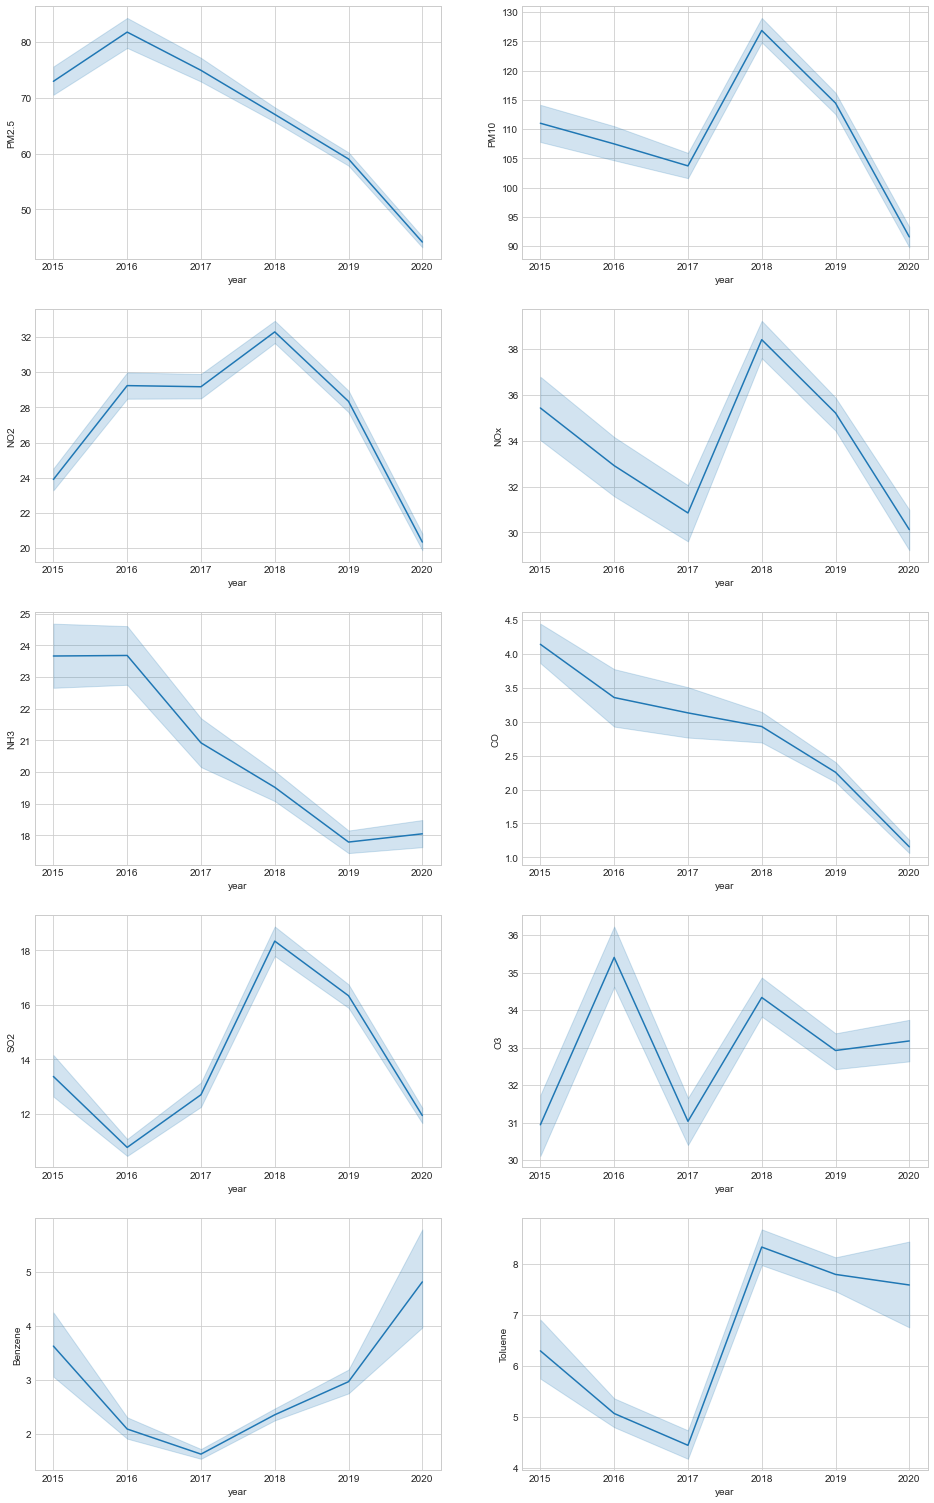

In [47]:
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene']

x=data.iloc[:,2:].reset_index()
fig=plt.figure(figsize=(16,32.5))
for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='year',y=col,data=x)

<div class="alert alert-block alert-info">
1) The pollutants PM10, NO2, NOx, SO2 were showing an exponential decrease with the starting of 2020. <br>
2) Although the decrease in PM2.5, CO and Toluene were not exponential, it can be seen there were some linear
   decrement over the years.<br>
3) After a huge decrement over the years, there was a slight linear increment in pollutant NH3.<br> 
4) Due to cut local nitrogen oxide emissions, the effect on ozone pollution was global and unexpectedly rapid emissions of nitrogen oxides (NOx) –which    create ozone, a danger to human health and to climate – decreased
   15% globally, with local reductions as high as 50%.

In [26]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])
    
    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

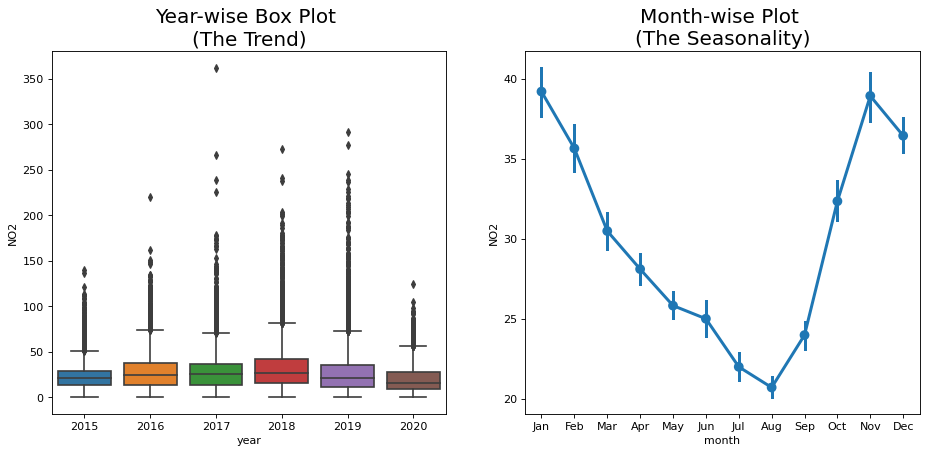

In [27]:
data.reset_index(inplace=True)
df = data.copy()
value='NO2'
trend_plot(df,value)

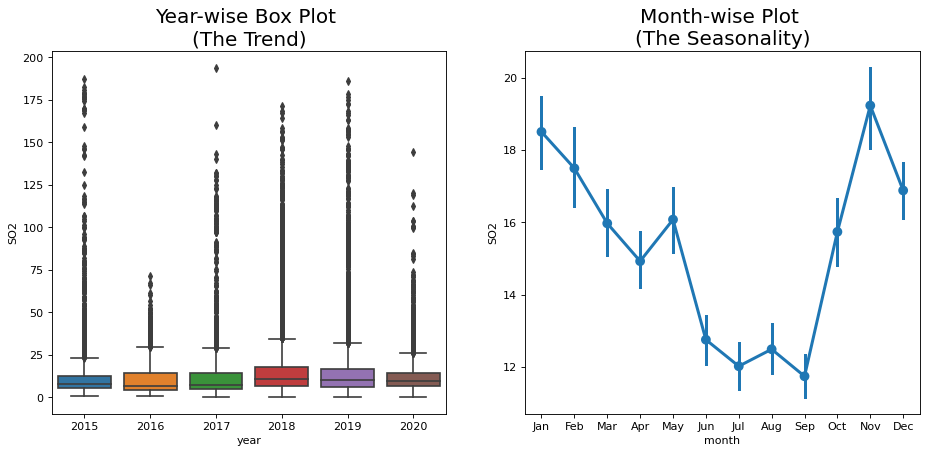

In [28]:
df = data.copy()
value='SO2'
trend_plot(df,value)

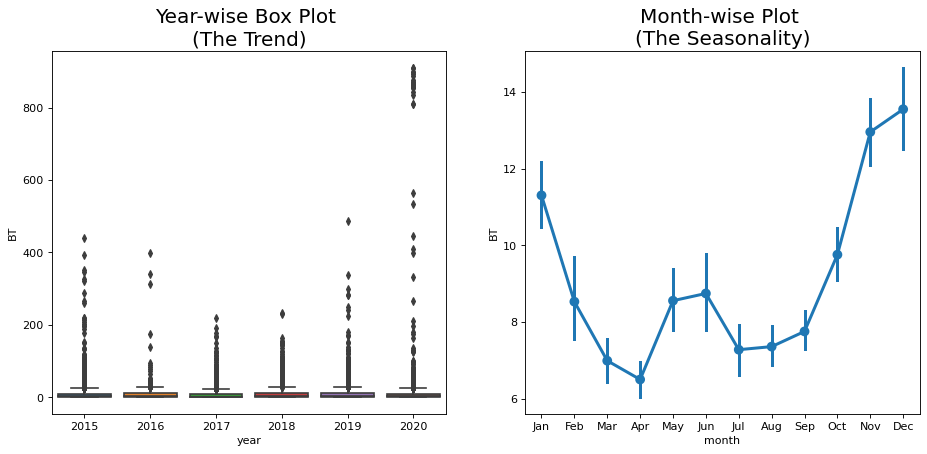

In [29]:
value='BT'
trend_plot(df,value)

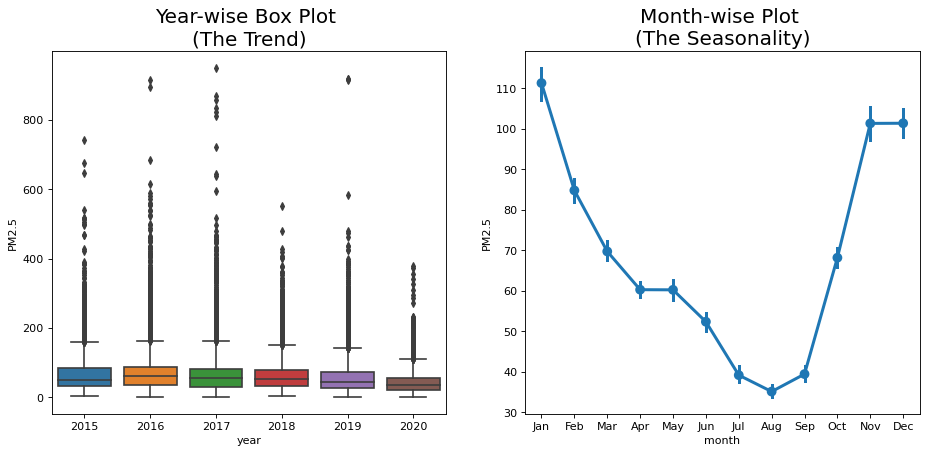

In [30]:
value='PM2.5'
trend_plot(df,value)

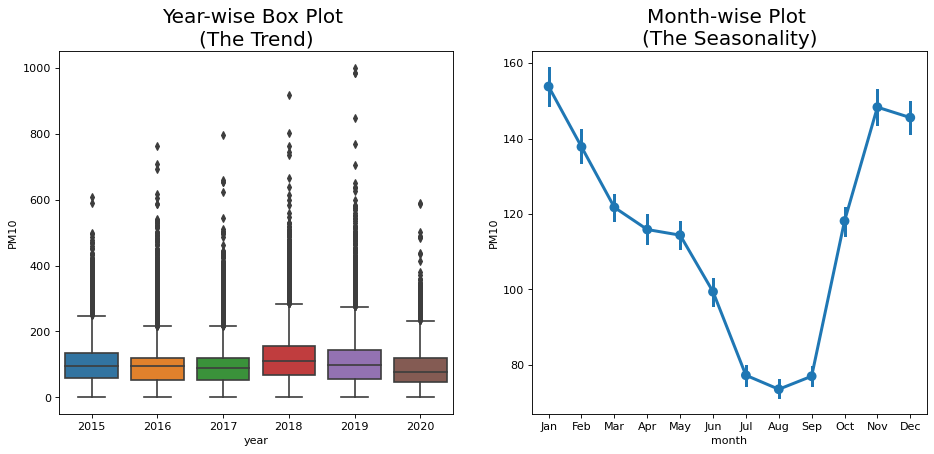

In [31]:
value='PM10'
trend_plot(df,value)

<div class="alert alert-block alert-info">
1) There is a clear trend that pollution level in India falls in the month of July and August. This might be majorly because monsoon sesason sets in during these months.The BTX levels additionally show a major decline around April.<br>
2) The pollution level then start rising and reach highest levels in winter months. Again, its during these months that a lot of crop residue burning takes place,especially in northern parts of India.<br>
3) SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.<br>
4) The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately.

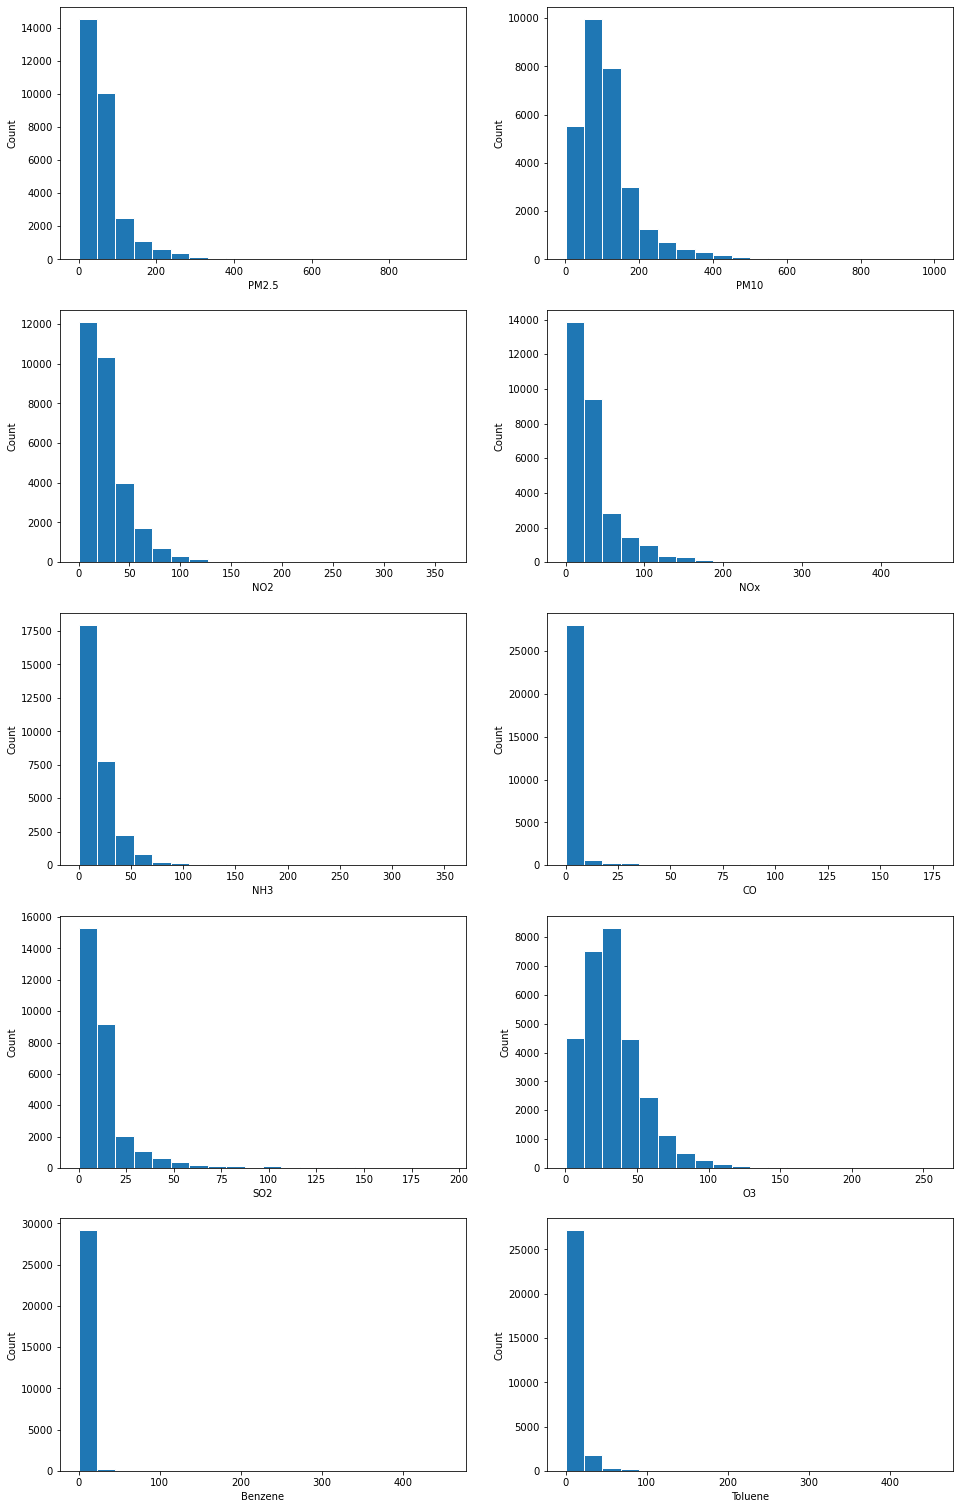

In [32]:
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene']

fig=plt.figure(figsize=(16,32.5))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(data[col].dropna(),bins=20,edgecolor='white')
    plt.xlabel(col)
    plt.ylabel('Count')

In [33]:
df = data.copy()
df = data[data['Date'] <= ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene'],axis=1)
df

Date           City    AQI  year  month     BT  \
0     2015-01-01      Ahmedabad   93.0  2015      1   0.02   
1     2015-01-02      Ahmedabad  125.5  2015      1   9.18   
2     2015-01-03      Ahmedabad  268.0  2015      1  23.20   
3     2015-01-04      Ahmedabad  177.5  2015      1  14.57   
4     2015-01-05      Ahmedabad  376.0  2015      1  25.90   
...          ...            ...    ...   ...    ...    ...   
29344 2019-12-28  Visakhapatnam  110.0  2019     12  14.92   
29345 2019-12-29  Visakhapatnam  133.0  2019     12  15.80   
29346 2019-12-30  Visakhapatnam   99.0  2019     12  12.10   
29347 2019-12-31  Visakhapatnam   92.0  2019     12  13.37   
29348 2020-01-01  Visakhapatnam  111.0  2020      1  11.04   

       Vehicular Pollution content  Industrial Pollution content  
0                          235.450                        161.02  
1                          295.250                         67.79  
2                          389.820                         82.97  
3                          301.000                         69.24  
4                          505.165                        104.54  
...                            ...                           ...  
29344                      250.700                         63.42  
29345                      173.415                         92.53  
29346                      200.705                         99.21  
29347                      222.470                         92.72  
29348                      235.200                         91.26  

[24908 rows x 8 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24908 entries, 0 to 29348
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          24908 non-null  datetime64[ns]
 1   City                          24908 non-null  object        
 2   AQI                           24908 non-null  float64       
 3   year                          24908 non-null  int64         
 4   month                         24908 non-null  int64         
 5   BT                            24908 non-null  float64       
 6   Vehicular Pollution content   24908 non-null  float64       
 7   Industrial Pollution content  24908 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.7+ MB


C:\Users\BR\AppData\Local\Temp/ipykernel_15372/2369650242.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Text(0.5, 0, 'Features')

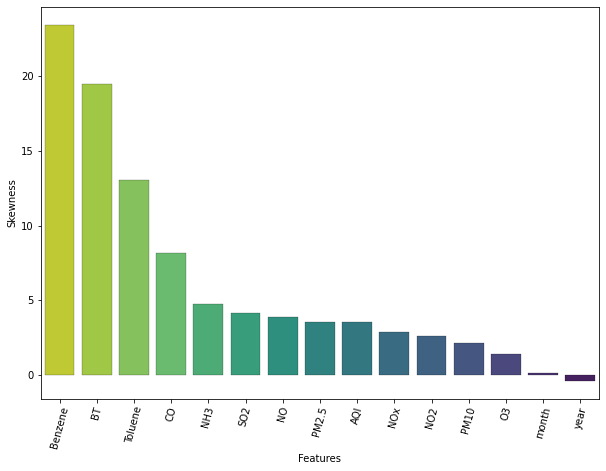

In [35]:
skew=pd.DataFrame(data.skew().sort_values(ascending=False))
skew.columns=['Skewness']

plt.figure(figsize=(10,7.2))
plt.xticks(rotation=75)
sns.barplot(x=skew.index,y='Skewness',data=skew,
            edgecolor='black',
            linewidth=0.2,
            palette='viridis_r')
plt.xlabel('Features')

<div class="alert alert-block alert-success">
Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. 

<div class="alert alert-block alert-info">
We observe high skewness in Benzene,Toluene and CO.  

In [36]:
def ploting(var):
    df[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

<AxesSubplot:xlabel='AQI', ylabel='City'>

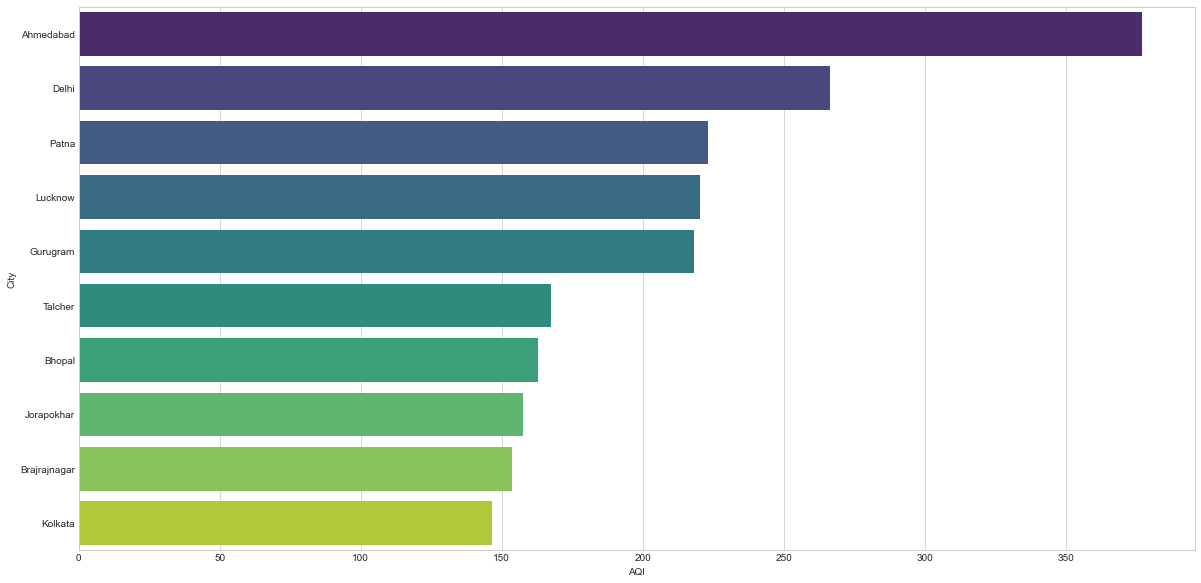

In [37]:
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='viridis')

<div class="alert alert-block alert-info">
AQI below 50 is considered good and below 100 is moderate, but in most of the major cities to India, it is extending more than 150, which is considered unhealthy

<AxesSubplot:xlabel='Count'>

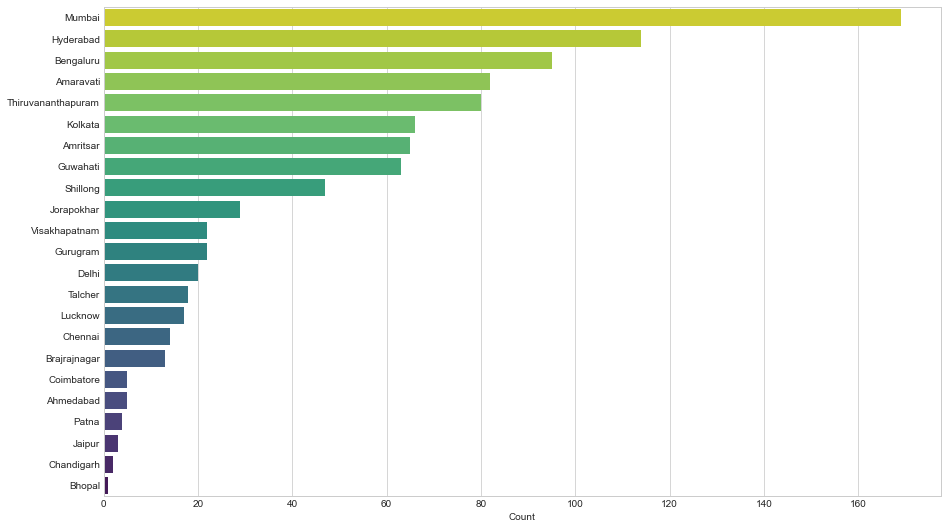

In [38]:
x=pd.DataFrame(df['City'][df['AQI']< 50 ].value_counts())
x=x.rename(columns={'City':'Count'})

plt.figure(figsize=(15,9))
sns.barplot(x='Count',y=x.index,data=x,palette='viridis_r')

Text(0.5, 1.0, 'Ahmedabad')

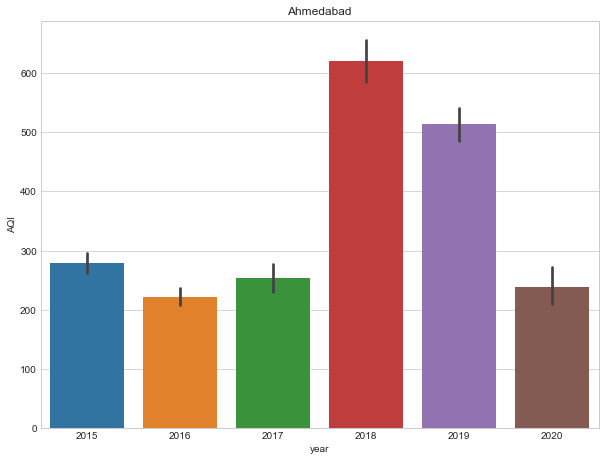

In [39]:
data['City'][data['AQI']>=500].value_counts()
cols=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow']

plt.figure(figsize=(10,7.5))
#selecting data pertaining to the selected city
x=data[data['City']=="Ahmedabad"]
sns.barplot(x='year',y='AQI',data=x)
plt.title("Ahmedabad")

Text(0.5, 1.0, 'Bengaluru')

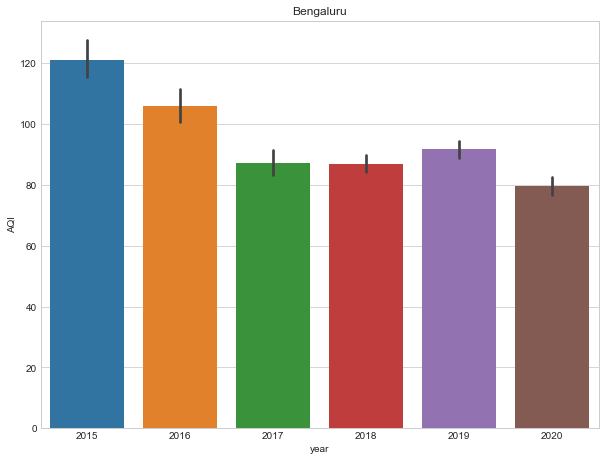

In [40]:
plt.figure(figsize=(10,7.5))
#selecting data pertaining to the selected city
x=data[data['City']=="Bengaluru"]
sns.barplot(x='year',y='AQI',data=x)
plt.title("Bengaluru")

Text(0.5, 1.0, 'Chennai')

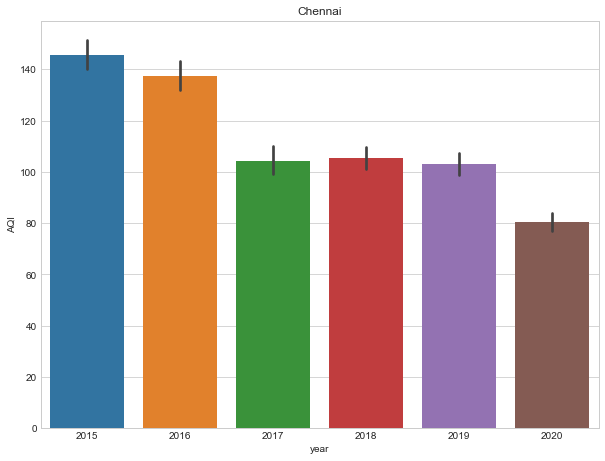

In [41]:
plt.figure(figsize=(10,7.5))
#selecting data pertaining to the selected city
x=data[data['City']=="Chennai"]
sns.barplot(x='year',y='AQI',data=x)
plt.title("Chennai")

Text(0.5, 1.0, 'Delhi')

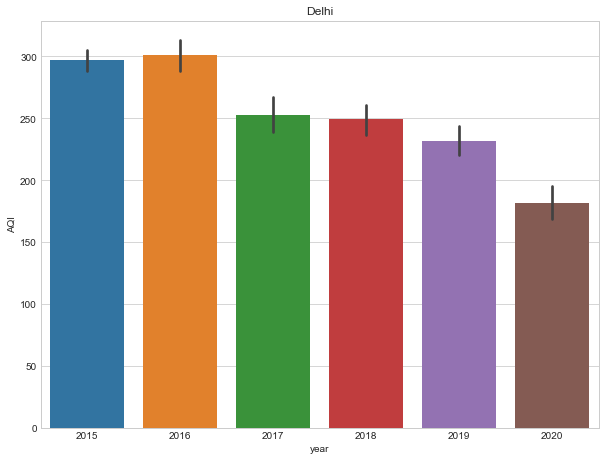

In [42]:
plt.figure(figsize=(10,7.5))
#selecting data pertaining to the selected city
x=data[data['City']=="Delhi"]
sns.barplot(x='year',y='AQI',data=x)
plt.title("Delhi")

Text(0.5, 1.0, 'Hyderabad')

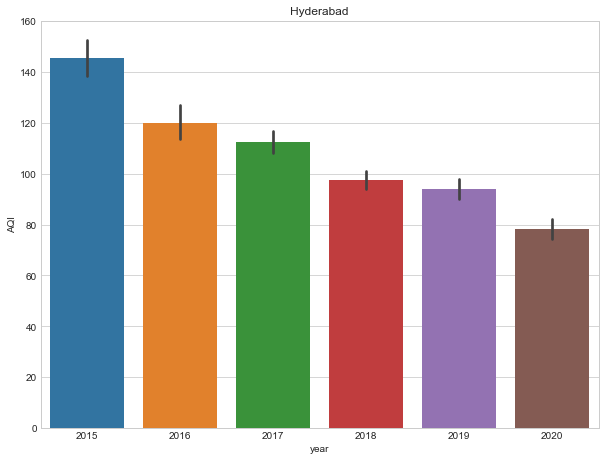

In [43]:

plt.figure(figsize=(10,7.5))
x=data[data['City']=="Hyderabad"]
sns.barplot(x='year',y='AQI',data=x)
plt.title("Hyderabad")

Text(0.5, 1.0, 'Mumbai')

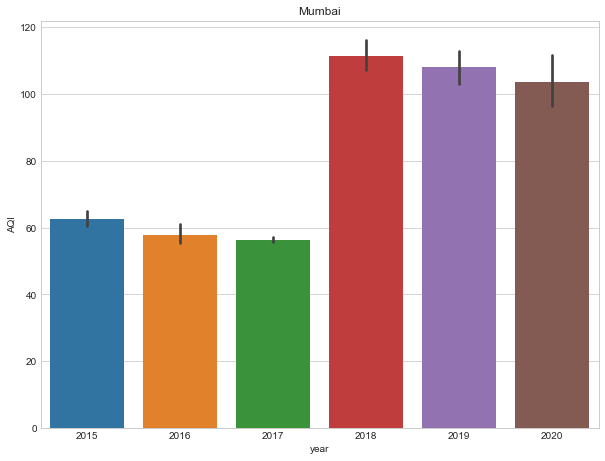

In [44]:
plt.figure(figsize=(10,7.5))
x=data[data['City']=="Mumbai"]
sns.barplot(x='year',y='AQI',data=x)
plt.title("Mumbai")

<div class="alert alert-block alert-info">
In all of the major cities in India which include Ahmedabad, Delhi, Bengaluru, Mumbai, Hyderabad, Chennai , there is a decrease in AQI in 2020.

In [45]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = data[data['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI']]
AQI.head()

AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=700,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

<div class="alert alert-block alert-info">

1)The black vertical line shows the date on which the first phase of lockdown ame into effect in India.<br>
2)The above graph shows the variation of various pollutant levels, from Jan 2019 onwards till date.<br>
3)Apparantely, all the above Indian cities seem to be a dangerously high level of pollution levels.<br>
4)Clearly, there appears to be a rapid decline after 25th March,2020 in all the cities under sonsideration.

Text(0.5, 1.0, 'AQI distribuiton of Chennai over Years')

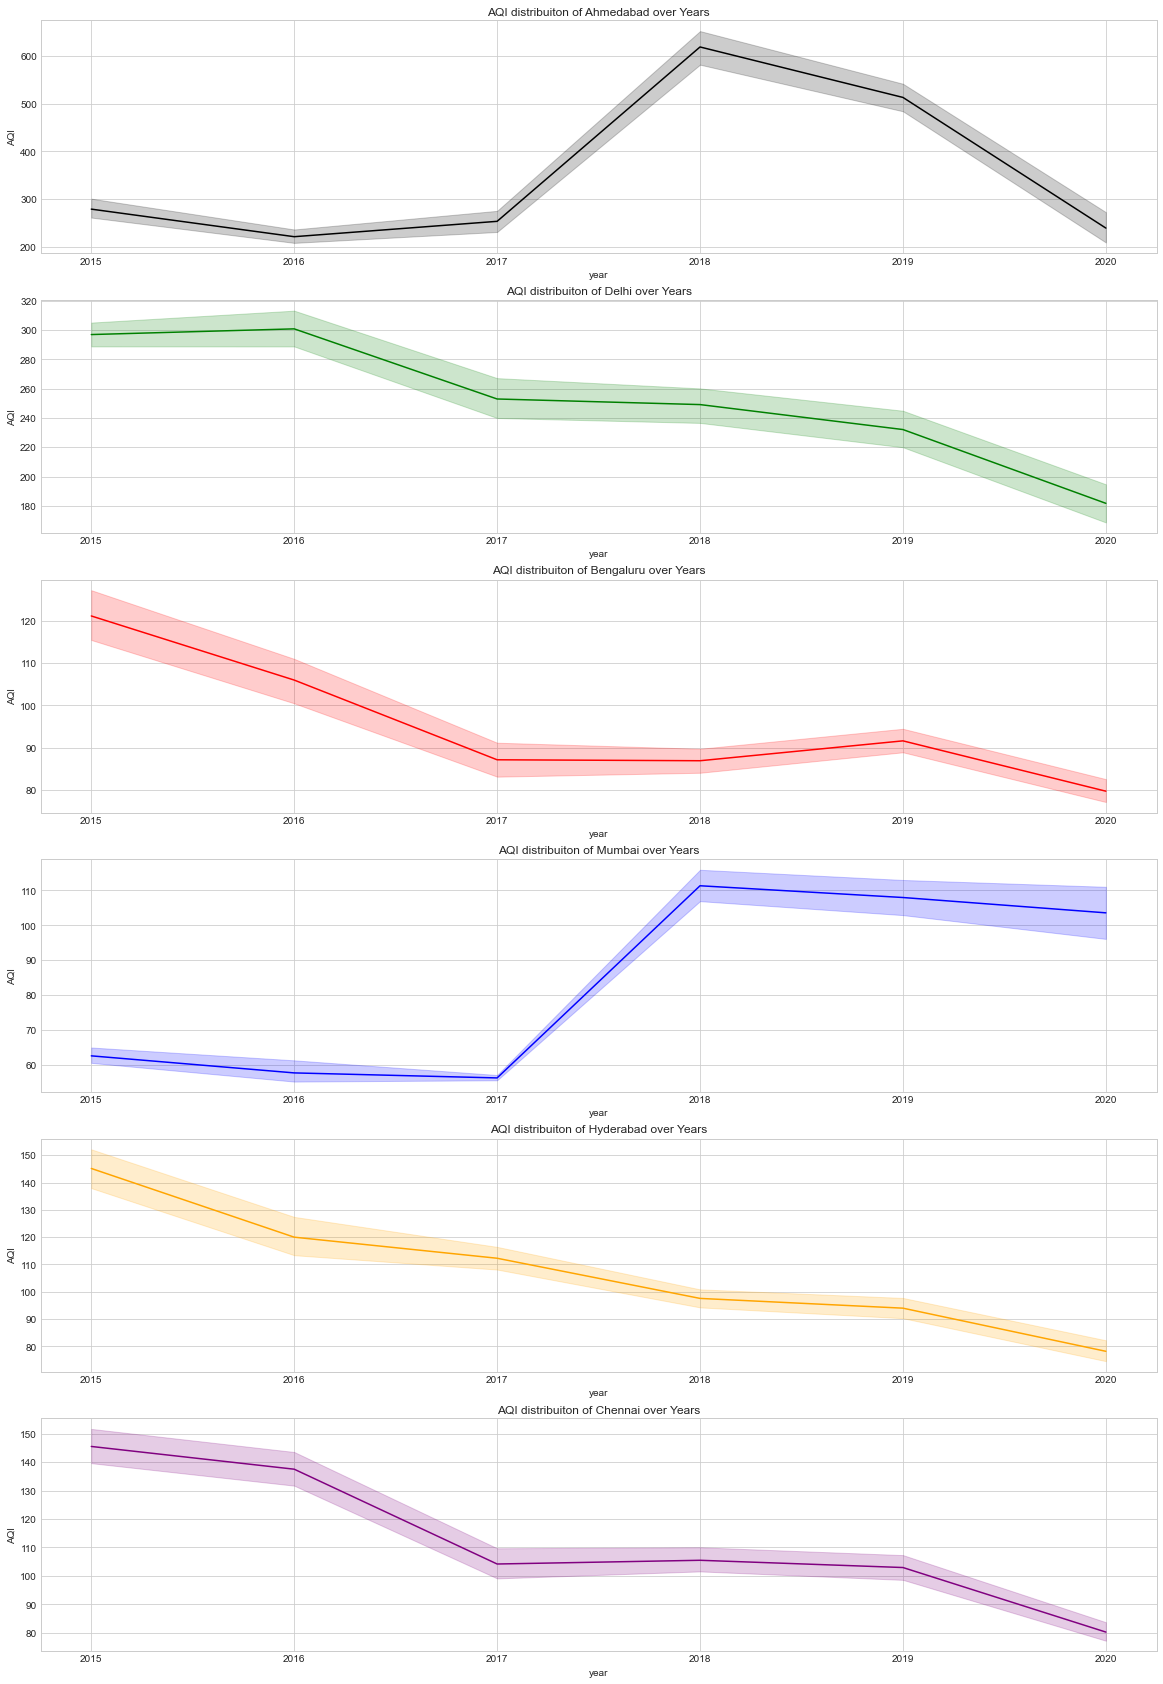

In [46]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']
x=data[data['City']=='Ahmedabad']
x1=data[data['City']=='Delhi']
x2=data[data['City']=='Bengaluru']
x3=data[data['City']=='Mumbai']
x4=data[data['City']=='Hyderabad']
x5=data[data['City']=='Chennai']
plt.style.use('seaborn-whitegrid')
fig,ax=plt.subplots(6,1)
fig.set_size_inches(20,30)
ax[0]=sns.lineplot(x='year',y='AQI',data=x,ax=ax[0],color='black')
ax[1]=sns.lineplot(x='year',y='AQI',data=x1,ax=ax[1],color='green')
ax[2]=sns.lineplot(x='year',y='AQI',data=x2,ax=ax[2],color='red')
ax[3]=sns.lineplot(x='year',y='AQI',data=x3,ax=ax[3],color='blue')
ax[4]=sns.lineplot(x='year',y='AQI',data=x4,ax=ax[4],color='orange')
ax[5]=sns.lineplot(x='year',y='AQI',data=x5,ax=ax[5],color='purple')
ax[0].set_title('AQI distribuiton of Ahmedabad over Years')
ax[1].set_title('AQI distribuiton of Delhi over Years')
ax[2].set_title('AQI distribuiton of Bengaluru over Years')
ax[3].set_title('AQI distribuiton of Mumbai over Years')
ax[4].set_title('AQI distribuiton of Hyderabad over Years')
ax[5].set_title('AQI distribuiton of Chennai over Years')